In [32]:
# 1. Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DejaVu Sans'

import seaborn as sns

# Set plotting styles
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# 2. Load the dataset
df = pd.read_csv("DelayedFlights.csv")
df.head()


,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [2]:
# Shape and info
print("Shape of dataset:", df.shape)
df.info()

# Check for null values
df.isnull().sum()


Shape of dataset: (1936758, 30)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted          

Unnamed: 0                0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

In [3]:
df.describe()


,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1.936758e+06,1936758.0,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.929648e+06,1.936758e+06,1.936758e+06,...,1.936758e+06,1.929648e+06,1.936303e+06,1.936758e+06,1.936758e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06
mean,3.341651e+06,2008.0,6.111106e+00,1.575347e+01,3.984827e+00,1.518534e+03,1.467473e+03,1.610141e+03,1.634225e+03,2.184263e+03,...,7.656862e+02,6.812975e+00,1.823220e+01,3.268348e-04,4.003598e-03,1.917940e+01,3.703571e+00,1.502164e+01,9.013714e-02,2.529647e+01
std,2.066065e+06,0.0,3.482546e+00,8.776272e+00,1.995966e+00,4.504853e+02,4.247668e+02,5.481781e+02,4.646347e+02,1.944702e+03,...,5.744797e+02,5.273595e+00,1.433853e+01,1.807562e-02,6.314722e-02,4.354621e+01,2.149290e+01,3.383305e+01,2.022714e+00,4.205486e+01
min,0.000000e+00,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,...,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.517452e+06,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,1.203000e+03,1.135000e+03,1.316000e+03,1.325000e+03,6.100000e+02,...,3.380000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.242558e+06,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.545000e+03,1.510000e+03,1.715000e+03,1.705000e+03,1.543000e+03,...,6.060000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,8.000000e+00
75%,4.972467e+06,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.900000e+03,1.815000e+03,2.030000e+03,2.014000e+03,3.422000e+03,...,9.980000e+02,8.000000e+00,2.100000e+01,0.000000e+00,0.000000e+00,2.100000e+01,0.000000e+00,1.500000e+01,0.000000e+00,3.300000e+01
max,7.009727e+06,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.742000e+03,...,4.962000e+03,2.400000e+02,4.220000e+02,1.000000e+00,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


In [4]:
# Drop rows with missing values 
df_cleaned = df.dropna()


In [27]:
df_cleaned = df_cleaned.rename(columns={"DayofMonth": "Day"})
df_cleaned["DATE"] = pd.to_datetime(df_cleaned[["Year", "Month", "Day"]])


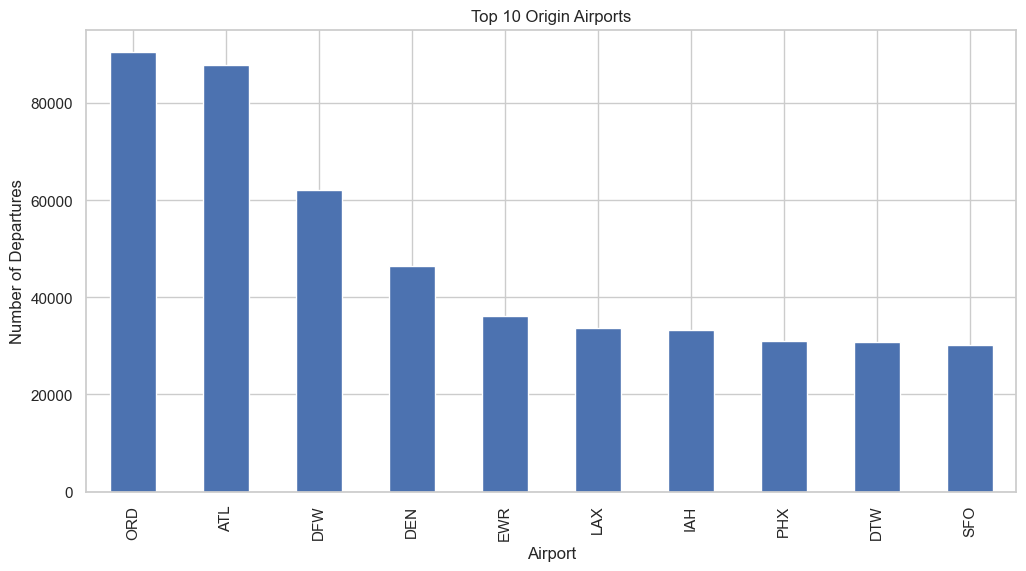

In [7]:
df_cleaned["Origin"].value_counts().head(10).plot(kind="bar", title="Top 10 Origin Airports")
plt.xlabel("Airport")
plt.ylabel("Number of Departures")
plt.show()


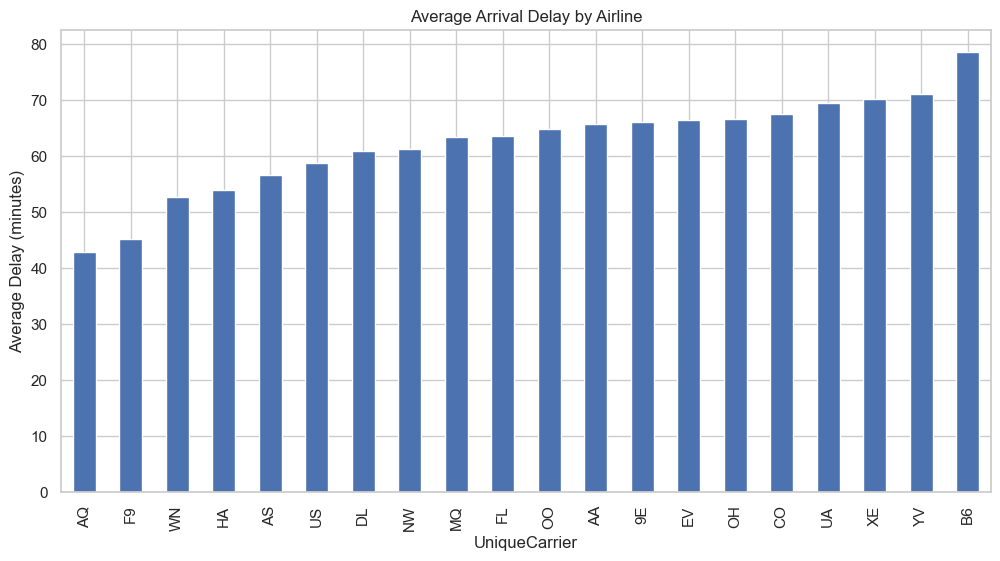

In [8]:
airline_delay = df_cleaned.groupby("UniqueCarrier")["ArrDelay"].mean().sort_values()
airline_delay.plot(kind="bar", title="Average Arrival Delay by Airline")
plt.ylabel("Average Delay (minutes)")
plt.show()


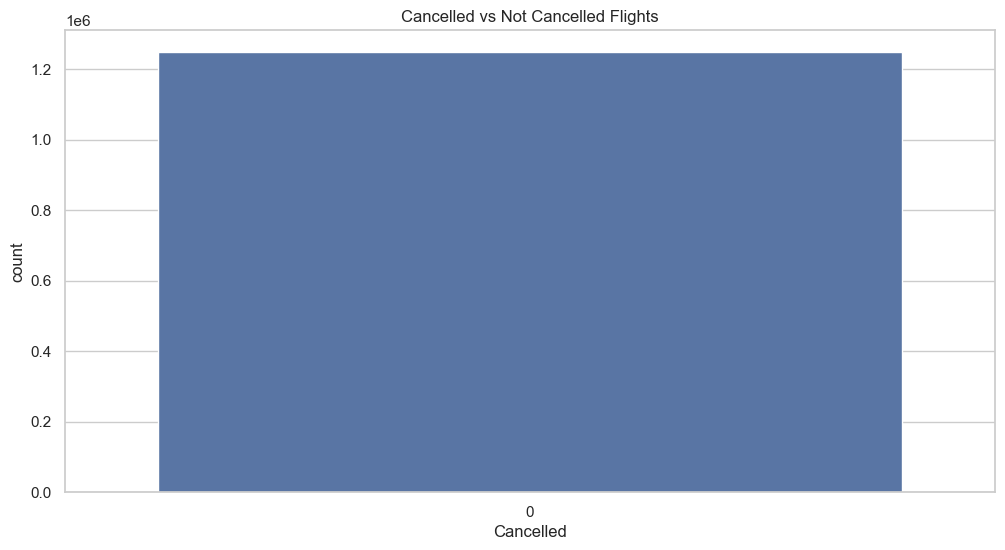

In [9]:
sns.countplot(x="Cancelled", data=df_cleaned)
plt.title("Cancelled vs Not Cancelled Flights")
plt.show()


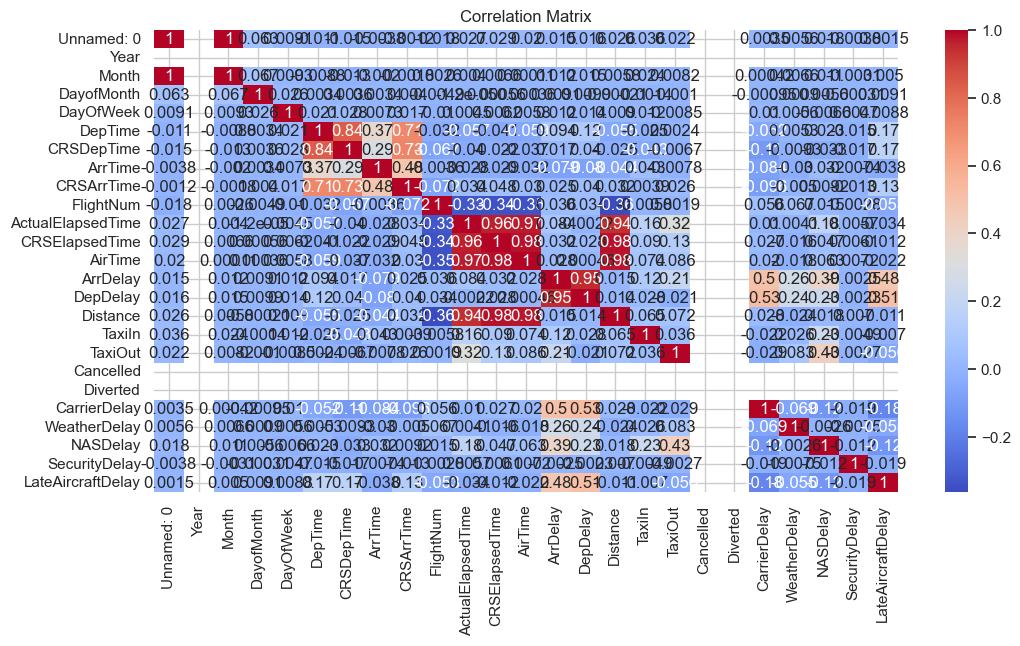

In [10]:
corr = df_cleaned.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


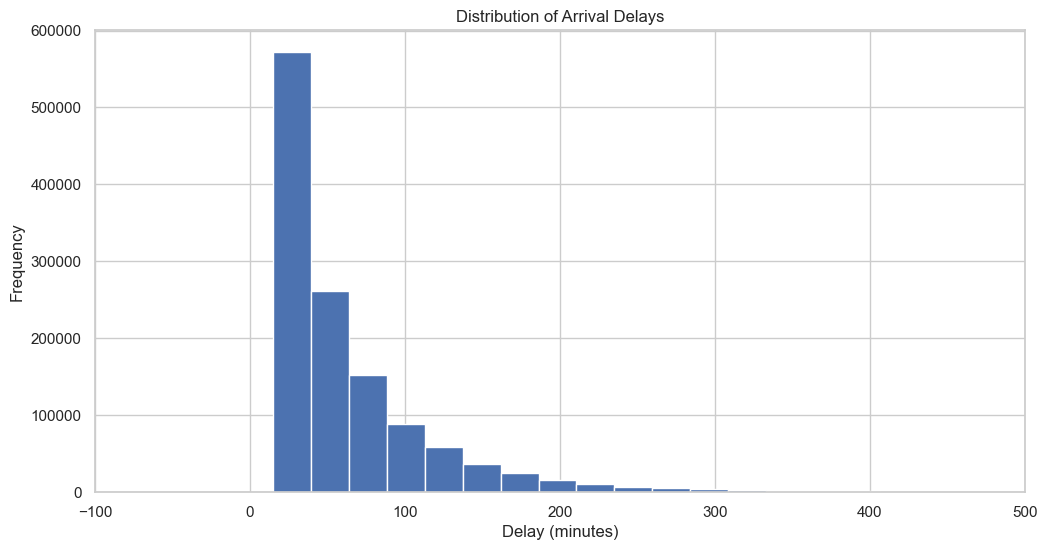

In [11]:
df_cleaned["ArrDelay"].plot(kind="hist", bins=100, title="Distribution of Arrival Delays", xlim=(-100, 500))
plt.xlabel("Delay (minutes)")
plt.show()


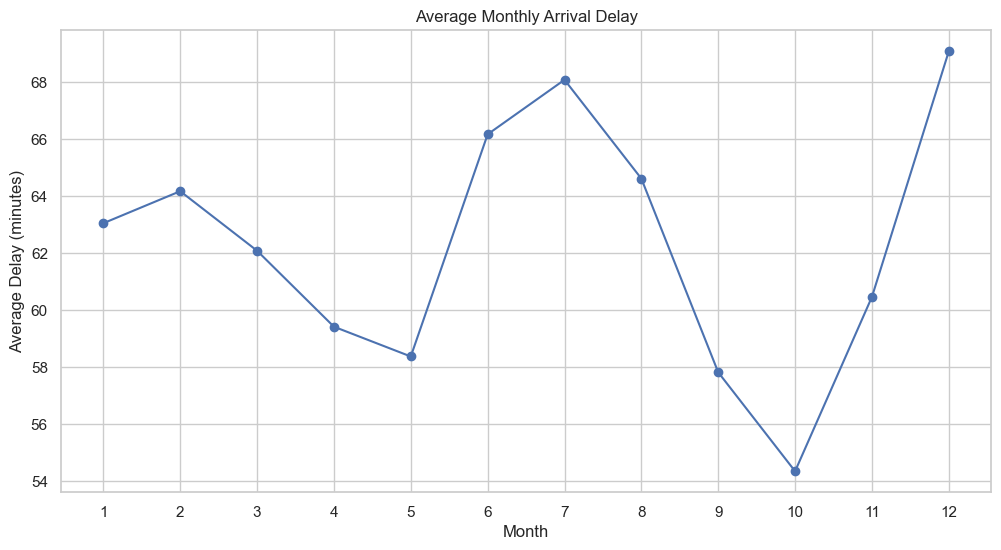

In [12]:
monthly_delay = df_cleaned.groupby("Month")["ArrDelay"].mean()
monthly_delay.plot(marker='o', title="Average Monthly Arrival Delay")
plt.ylabel("Average Delay (minutes)")
plt.xticks(range(1,13))
plt.grid(True)
plt.show()


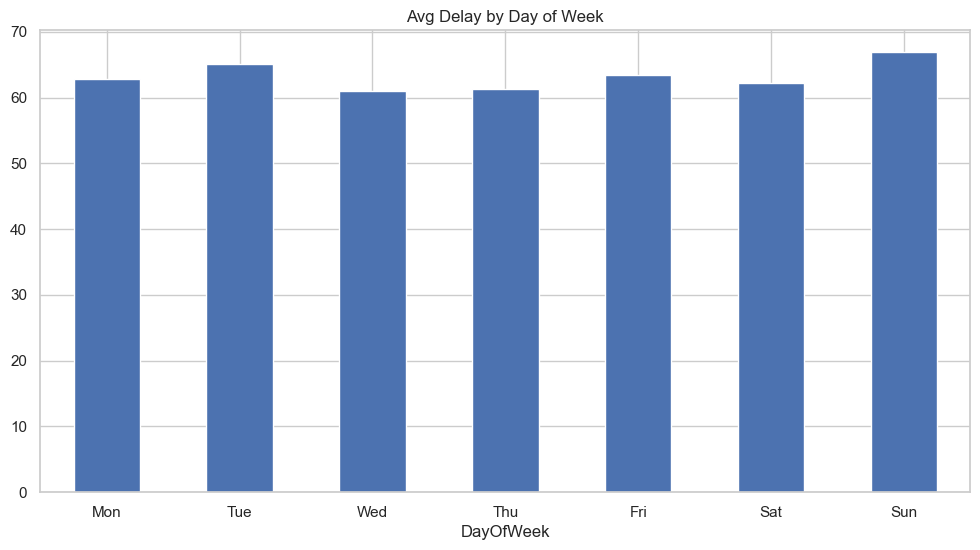

In [13]:
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df_cleaned.groupby("DayOfWeek")["ArrDelay"].mean().plot(kind="bar", title="Avg Delay by Day of Week", rot=0)
plt.xticks(ticks=range(7), labels=day_names)
plt.show()


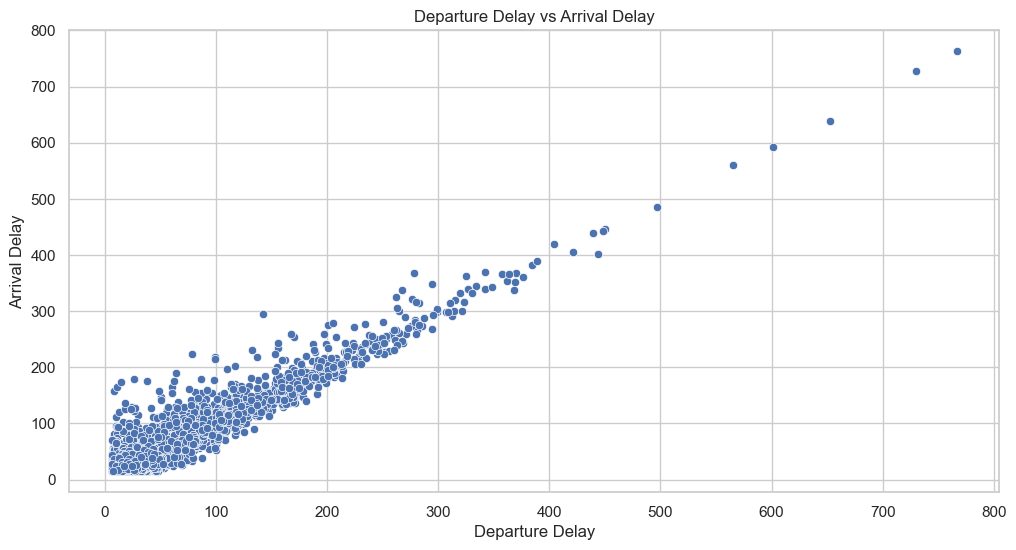

In [14]:
sns.scatterplot(x="DepDelay", y="ArrDelay", data=df_cleaned.sample(5000))
plt.title("Departure Delay vs Arrival Delay")
plt.xlabel("Departure Delay")
plt.ylabel("Arrival Delay")
plt.show()


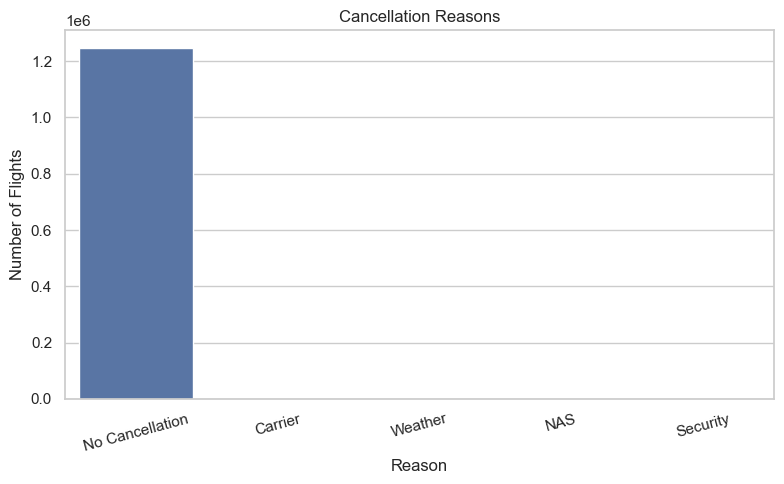

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
cancel_reasons = {
    'A': "Carrier",
    'B': "Weather",
    'C': "NAS",
    'D': "Security"
}
# Fill NaNs with "No Cancellation"
df_cleaned['CancellationReason'] = df_cleaned['CancellationCode'].map(cancel_reasons)
df_cleaned['CancellationReason'] = df_cleaned['CancellationReason'].fillna('No Cancellation')

# Plotting
plt.figure(figsize=(8, 5))
sns.countplot(x="CancellationReason", data=df_cleaned, order=[
    "No Cancellation", "Carrier", "Weather", "NAS", "Security"
])
plt.title("Cancellation Reasons")
plt.xlabel("Reason")
plt.ylabel("Number of Flights")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [16]:
delayed = df_cleaned[df_cleaned["ArrDelay"] > 15]
print("Percentage of significantly delayed flights:", round(len(delayed)/len(df_cleaned)*100, 2), "%")


Percentage of significantly delayed flights: 97.4 %


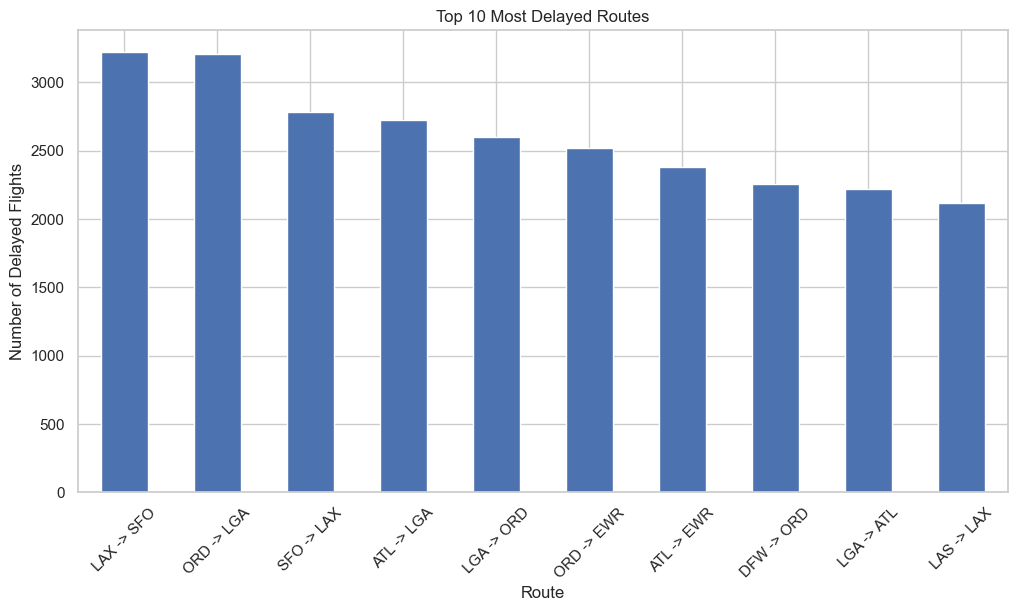

In [34]:
df_cleaned.loc[:, "Route"] = df_cleaned["Origin"] + " -> " + df_cleaned["Dest"]
top_routes = df_cleaned[df_cleaned["ArrDelay"] > 15]["Route"].value_counts().head(10)
top_routes.plot(kind="bar", title="Top 10 Most Delayed Routes")
plt.xticks(rotation=45)
plt.ylabel("Number of Delayed Flights")
plt.show()


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler


In [37]:
import pandas as pd
import numpy as np

# 1. Scheduled Departure Hour
df['CRSDepTime'] = df['CRSDepTime'].fillna(0)
df['DepHour'] = df['CRSDepTime'].apply(lambda x: int(str(int(x)).zfill(4)[:2]))

# 2. Approximate Flight Duration
if 'CRSElapsedTime' in df.columns:
    df['FlightDuration'] = df['CRSElapsedTime']
else:
    df['FlightDuration'] = np.nan  # placeholder if missing

# 3. Weekend or Weekday
df['Is_Weekend'] = df['DayOfWeek'].apply(lambda x: 1 if x in [6, 7] else 0)

# 4. Quarter of the year
df['Quarter'] = df['Month'].apply(lambda x: (x - 1) // 3 + 1)

# 5. Target variable: Significant Delay (Arrival Delay > 15 min)
df['SignificantDelay'] = df['ArrDelay'].apply(lambda x: 1 if x > 15 else 0)

# Show available columns to confirm
print("Columns available after feature engineering:\n", df.columns)


Columns available after feature engineering:
 Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'FL_DATE', 'DayOfWeek_Name', 'WeekOfYear', 'Is_Weekend', 'Quarter',
       'DepHour', 'SignificantDelay', 'Route', 'TotalDelay',
       'PrimaryDelayCause', 'FlightDuration', 'FlightCategory',
       'CancellationReason', 'ArrDelayCategory'],
      dtype='object')


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Features to use
features = ['Month', 'DayOfWeek', 'DepHour', 'Distance', 'FlightDuration', 'Is_Weekend', 'Quarter']

# Filter only necessary columns and drop rows with missing values
df_model = df[features + ['SignificantDelay']].dropna()

# Split into X (features) and y (target)
X = df_model[features]
y = df_model['SignificantDelay']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6252401164952287
Confusion Matrix:
 [[  2907 141749]
 [  3400 239256]]
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.02      0.04    144656
           1       0.63      0.99      0.77    242656

    accuracy                           0.63    387312
   macro avg       0.54      0.50      0.40    387312
weighted avg       0.57      0.63      0.50    387312



In [39]:
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_[0]
})
print(coef_df.sort_values(by='Coefficient', ascending=False))


          Feature  Coefficient
0           Month     0.077314
2         DepHour     0.030867
1       DayOfWeek     0.018353
4  FlightDuration     0.006611
3        Distance    -0.000986
5      Is_Weekend    -0.127495
6         Quarter    -0.280207
